<a href="https://colab.research.google.com/github/Infant-Joshva/Project_3-Employee_Attrition_Analysis_and_Prediction/blob/main/notebooks/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project(Employee Attrition ML Model) Initialation and Data Cleaning

#### Importing Necessary Packages

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
sheet_id= '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = "sheet1"

#https://docs.google.com/spreadsheets/d/1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE/edit?gid=1416055552#gid=1416055552

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

emp_df=pd.read_csv(url)

In [ ]:
emp_df.to_csv("employee_data_raw", index=False)

In [ ]:
emp_df.head(10)

####Data Type conversion

In [ ]:
emp_df.info()

####Handling Null Values

In [ ]:
emp_df.isnull().sum() # There is no null values

#### Deleting Unwanted Column

In [ ]:
emp_df.drop(columns=['EmployeeCount','DailyRate','Over18','StandardHours'],inplace=True)

In [ ]:
emp_df.info()

#### Column renaming

In [ ]:
emp_df.rename(columns={'EmployeeNumber':'Emp_ID'},inplace=True)

In [ ]:
emp_df.info()

#### Checking the each column unique values

In [ ]:
emp_df.nunique()

In [ ]:
#exclude_cols = ['Age']  # columns to skip

value_counts_dict = {}

for col in emp_df.columns:
    #if col not in exclude_cols:
        value_counts_dict[col] = emp_df[col].value_counts()

# Access value counts of a specific column
print(value_counts_dict['MaritalStatus'])


####Deleting Duplicate Values

In [ ]:
emp_df.duplicated().sum()

In [ ]:
emp_df.drop_duplicates(inplace=True) #Used to drop the duplicate values

####Storing cleaned data to CSV

In [ ]:
emp_df.to_csv("employee_data_cleaned.csv", index=False)

In [ ]:
emp_df.info()

# EDA - Uni, Bi-Varient, Multivariate and **Feature selection**

**The major types of analysis you’ll typically do in data preprocessing for ML, it’s mainly:**



---


1. Univariate Analysis
* One variable at a time.

* Purpose: Understand distribution, central tendency, spread, and outliers.


---


2. Bivariate Analysis
* Two variables at a time.

* Purpose: Find relationships, correlations, and trends.


---


3. Multivariate Analysis
* Three or more variables together.

* Purpose: Detect combined effects, interactions, patterns, and multicollinearity.


---


4. Missing Value Analysis
* Purpose: Identify and handle missing or incomplete data.


---


5. Outlier Analysis
* Purpose: Detect and decide how to treat extreme/unusual values.


---


6. Correlation Analysis
* Purpose: Measure relationship strength, avoid redundant features.


---


7. Class Imbalance Analysis (for classification problems)
* Purpose: Check if target variable has uneven distribution.

### Univarient Analysis

#### Importing necessary packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Loop through only numerical columns
for col in emp_df.select_dtypes(include=['int64', 'float64']).columns:
    fig = px.histogram(emp_df, x=col, nbins=10, marginal="box")
    fig.update_layout(title_text=f"Distribution of {col}")
    fig.show()

    print(f"Summary statistics for {col}:\n")
    print(emp_df[col].describe(), "\n" + "-"*50 + "\n")


In [ ]:
# Loop through only categorical/object columns
for col in emp_df.select_dtypes(exclude=['int64', 'float64']).columns:
    fig = px.histogram(emp_df, x=col)
    fig.update_layout(title_text=f"Category counts for {col}")
    fig.show()

    print(f"Summary statistics for {col}:\n")
    print(emp_df[col].describe(), "\n" + "-"*50 + "\n")


### Bivarient Analysis

* Our target is Attrition, so X will be Attrition for all.

In [ ]:
# sns.pairplot(emp_df,hue='Attrition')

In [ ]:
selected_df = emp_df.select_dtypes(include=['int64', 'float64'])
corr_df = selected_df.corr()
corr_df

In [ ]:
fig = px.imshow(corr_df)

fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    width=800,   # width in pixels
    height=800   # height in pixels
)
fig.show()

1. Numerical vs Numerical
  *Scatter Plot*


---


2. Numerical vs Categorical
  *Bar Plot*


---


3. Categorical vs Categorical
  *Stacked Bar Chart*

#### Num vs Categorical

In [ ]:
#Numerical column
num_cols = emp_df.select_dtypes(include=['int64', 'float64']).columns
num_cols

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='Age',hue='Attrition')

# Therefore 'Age' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='DistanceFromHome',hue='Attrition')

# Therefore 'DistanceFromHome' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='Education',hue='Attrition')

# Therefore 'Education' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='EnvironmentSatisfaction',hue='Attrition')

# Therefore 'EnvironmentSatisfaction' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='HourlyRate',hue='Attrition')

# Therefore 'HourlyRate' not need for ML - Model

* Hypothesis test for 'HourlyRate'

In [ ]:
from scipy.stats import ttest_ind

# class A and B scores
class_A = emp_df[emp_df['Attrition'] == 'Yes']['HourlyRate']
class_B = emp_df[emp_df['Attrition'] == 'No']['HourlyRate']

# Perform two-sample t-test (assume equal variances)
t_statistic, p_value = ttest_ind(class_A, class_B)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in HourlyRate between Attrition (Yes) and Attrition (No).")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in HourlyRate between Attrition (Yes) and Attrition (No).")

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='JobInvolvement',hue='Attrition')

# Therefore 'JobInvolvement' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='JobLevel',hue='Attrition')

# Therefore 'JobLevel' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='JobSatisfaction',hue='Attrition')

# Therefore 'JobSatisfaction' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='MonthlyIncome',hue='Attrition')

# Therefore 'MonthlyIncome' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='NumCompaniesWorked',hue='Attrition')

# Therefore 'NumCompaniesWorked' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='PerformanceRating',hue='Attrition')

# Therefore 'PerformanceRating' not need for ML - Model

* Hypothesis for 'PerformanceRating'

In [ ]:
# class A and B scores
class_A = emp_df[emp_df['Attrition'] == 'Yes']['PerformanceRating']
class_B = emp_df[emp_df['Attrition'] == 'No']['PerformanceRating']

# Perform two-sample t-test (assume equal variances)
t_statistic, p_value = ttest_ind(class_A, class_B)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in PerformanceRating between Attrition (Yes) and Attrition (No).")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in PerformanceRating between Attrition (Yes) and Attrition (No).")

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='RelationshipSatisfaction',hue='Attrition')

# Therefore 'RelationshipSatisfaction' is need for ML - Model

In [ ]:
num_cols

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='TotalWorkingYears',hue='Attrition')

# Therefore 'TotalWorkingYears' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='TrainingTimesLastYear',hue='Attrition')

# Therefore 'TrainingTimesLastYear' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='WorkLifeBalance',hue='Attrition')

# Therefore 'WorkLifeBalance' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='YearsAtCompany',hue='Attrition')

# Therefore 'YearsAtCompany' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='YearsInCurrentRole',hue='Attrition')

# Therefore 'YearsInCurrentRole' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='YearsSinceLastPromotion',hue='Attrition')

# Therefore 'YearsSinceLastPromotion' need for ML - Model

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=emp_df,x='Attrition',y='YearsWithCurrManager',hue='Attrition')

# Therefore 'YearsWithCurrManager' need for ML - Model

#### Categorical vs Categorical

In [ ]:
categorical_col = emp_df.select_dtypes(exclude=['int64', 'float64']).columns
categorical_col

<Axes: xlabel='BusinessTravel', ylabel='Attrition_Ratio'>

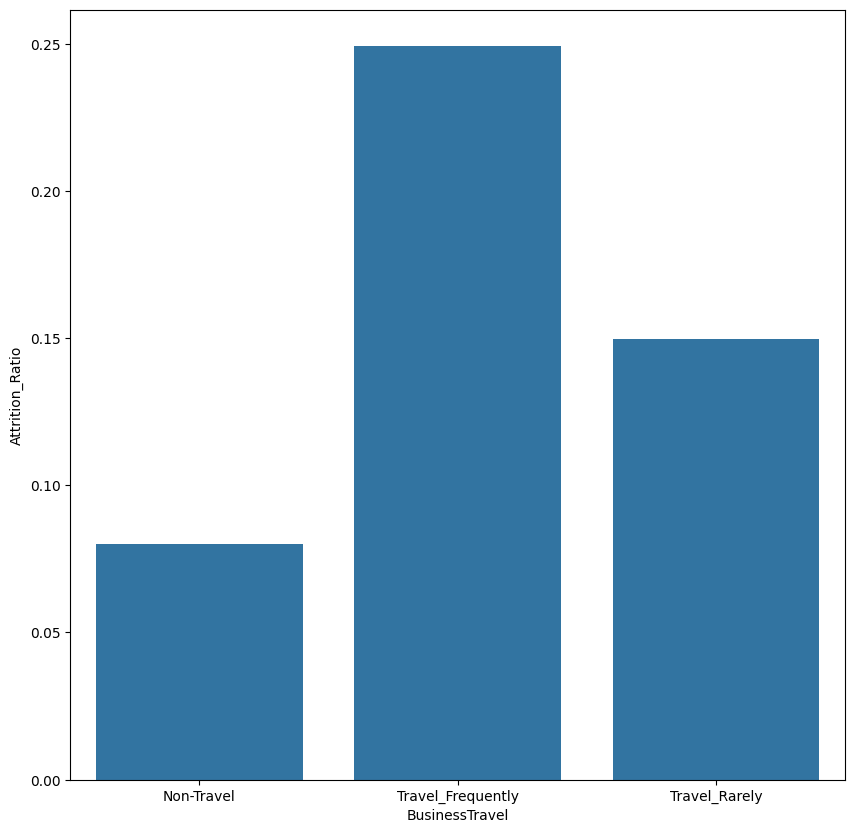

In [121]:
crosstab_df = pd.crosstab(emp_df['BusinessTravel'], emp_df['Attrition'])
crosstab_df['Attrition_Ratio'] = crosstab_df['Yes'] / (crosstab_df['No'] + crosstab_df['Yes'])
crosstab_df

plt.figure(figsize=(10,10))
sns.barplot(data=crosstab_df,x=crosstab_df.index,y='Attrition_Ratio')

# Therefore 'BusinessTravel' need for ML - Model

<Axes: xlabel='Department', ylabel='Attrition_Ratio'>

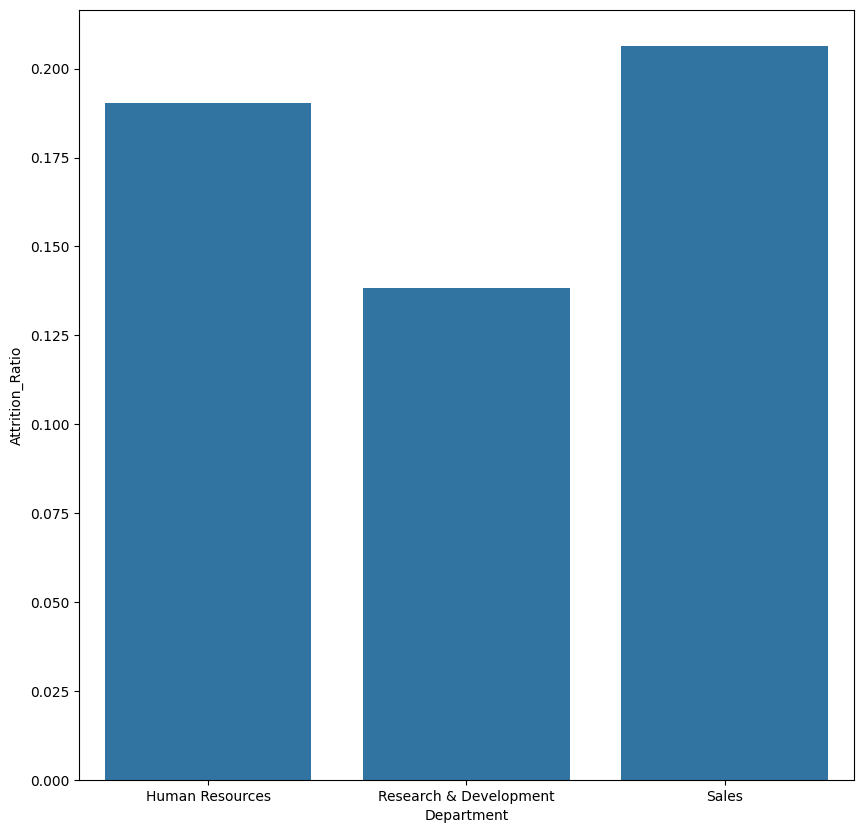

In [123]:
crosstab_df = pd.crosstab(emp_df['Department'], emp_df['Attrition'])
crosstab_df['Attrition_Ratio'] = crosstab_df['Yes'] / (crosstab_df['No'] + crosstab_df['Yes'])
crosstab_df

plt.figure(figsize=(10,10))
sns.barplot(data=crosstab_df,x=crosstab_df.index,y='Attrition_Ratio')

# Therefore 'Department' need for ML - Model

<Axes: xlabel='EducationField', ylabel='Attrition_Ratio'>

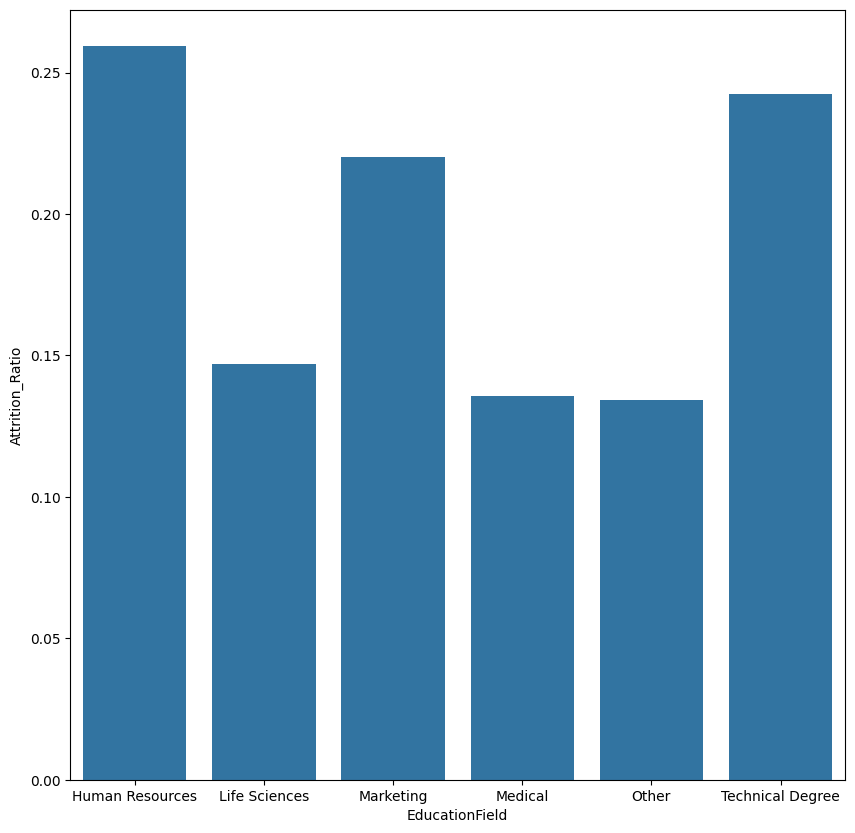

In [124]:
crosstab_df = pd.crosstab(emp_df['EducationField'], emp_df['Attrition'])
crosstab_df['Attrition_Ratio'] = crosstab_df['Yes'] / (crosstab_df['No'] + crosstab_df['Yes'])
crosstab_df

plt.figure(figsize=(10,10))
sns.barplot(data=crosstab_df,x=crosstab_df.index,y='Attrition_Ratio')

# Therefore 'EducationField' need for ML - Model

<Axes: xlabel='Gender', ylabel='Attrition_Ratio'>

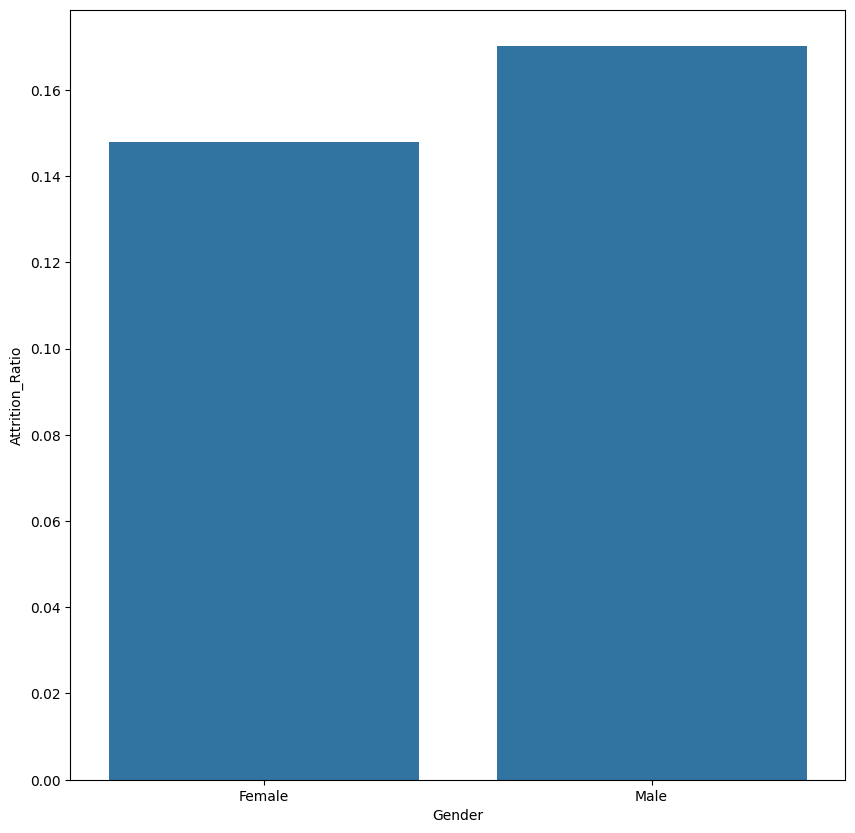

In [125]:
crosstab_df = pd.crosstab(emp_df['Gender'], emp_df['Attrition'])
crosstab_df['Attrition_Ratio'] = crosstab_df['Yes'] / (crosstab_df['No'] + crosstab_df['Yes'])
crosstab_df

plt.figure(figsize=(10,10))
sns.barplot(data=crosstab_df,x=crosstab_df.index,y='Attrition_Ratio')

# Therefore 'Gender' need for ML - Model

<Axes: xlabel='JobRole', ylabel='Attrition_Ratio'>

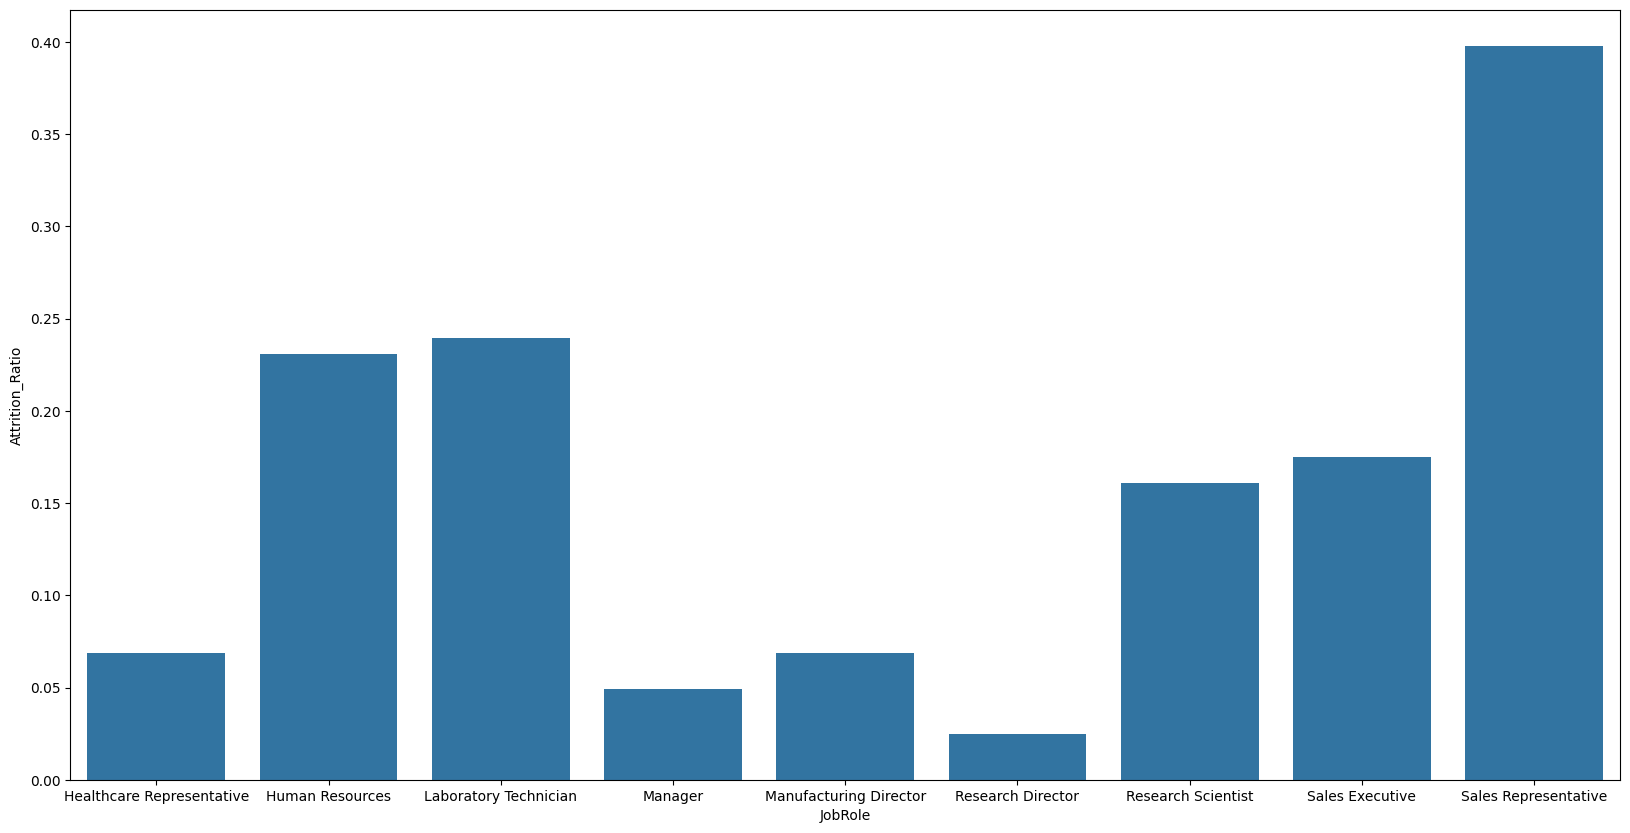

In [127]:
crosstab_df = pd.crosstab(emp_df['JobRole'], emp_df['Attrition'])
crosstab_df['Attrition_Ratio'] = crosstab_df['Yes'] / (crosstab_df['No'] + crosstab_df['Yes'])
crosstab_df

plt.figure(figsize=(20,10))
sns.barplot(data=crosstab_df,x=crosstab_df.index,y='Attrition_Ratio')

# Therefore 'JobRole' need for ML - Model

<Axes: xlabel='MaritalStatus', ylabel='Attrition_Ratio'>

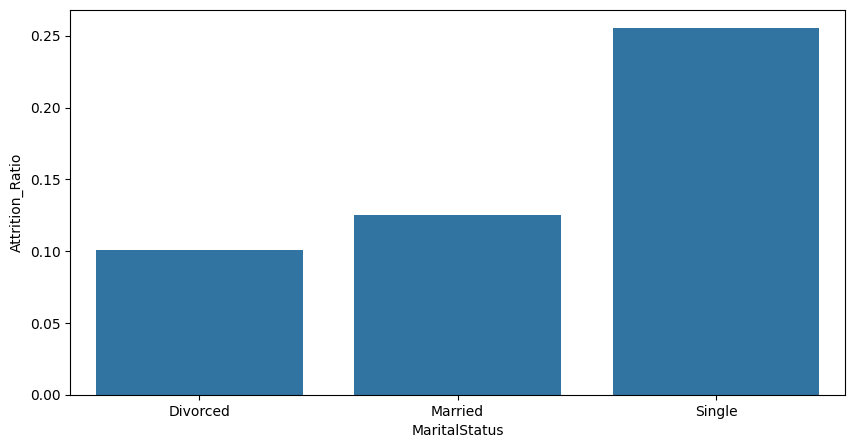

In [130]:
crosstab_df = pd.crosstab(emp_df['MaritalStatus'], emp_df['Attrition'])
crosstab_df['Attrition_Ratio'] = crosstab_df['Yes'] / (crosstab_df['No'] + crosstab_df['Yes'])
crosstab_df

plt.figure(figsize=(10,5))
sns.barplot(data=crosstab_df,x=crosstab_df.index,y='Attrition_Ratio')

# Therefore 'MaritalStatus' need for ML - Model

<Axes: xlabel='OverTime', ylabel='Attrition_Ratio'>

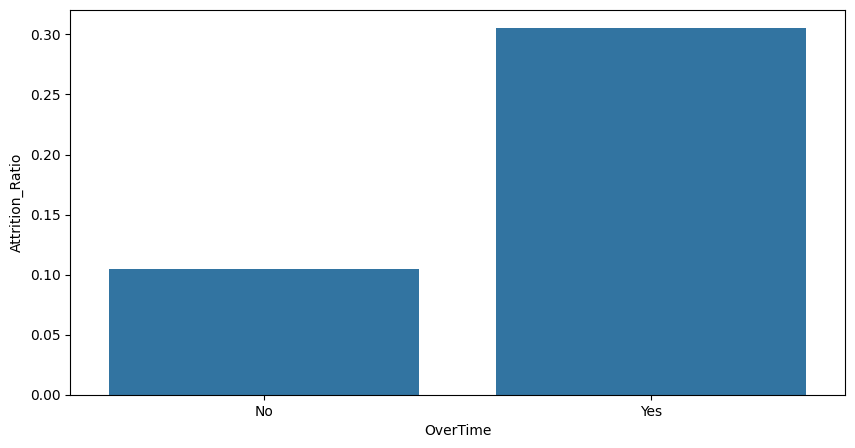

In [131]:
crosstab_df = pd.crosstab(emp_df['OverTime'], emp_df['Attrition'])
crosstab_df['Attrition_Ratio'] = crosstab_df['Yes'] / (crosstab_df['No'] + crosstab_df['Yes'])
crosstab_df

plt.figure(figsize=(10,5))
sns.barplot(data=crosstab_df,x=crosstab_df.index,y='Attrition_Ratio')

# Therefore 'OverTime' need for ML - Model

# Feature and Target

In [ ]:
emp_df.columns

In [ ]:
# Creating Features and Target in new DataFrame

X=emp_df[['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
         'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','BusinessTravel',
         'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']] # Features
Y=emp_df['Attrition'] # Target

# **Feature Selection** (ML)

*Encoding is only for categorical data and nominal, ordinal data's*



*   X is a Features
*   Y is a Target



In [ ]:
emp_df.info()

In [ ]:
# Seperating Numerical and Categorical Features
# For 1st we seperating Numerical into 2 types one is Continues and Discreat

num_feature=X[X.select_dtypes(include=['int64','float64','int32']).columns]
num_feature

In [ ]:
# We have continues and discret values so we again seperating numerical values
num_feature_dis = num_feature[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
                               'RelationshipSatisfaction','WorkLifeBalance','PerformanceRating']].reset_index(drop=True) # Discreat Values
                               #Need to confirm "StockOptionLevel" is needed or not
num_features_con = num_feature[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
                                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].reset_index(drop=True) # Continues Values

In [ ]:
num_feature_dis

In [ ]:
num_features_con

In [ ]:
# Seperating Categorical features

cat_feature=X[X.select_dtypes(include=['object']).columns].reset_index(drop=True)
cat_feature

In [ ]:
cat_feature_OH = cat_feature[['BusinessTravel','Department','Gender','MaritalStatus','OverTime']].reset_index(drop=True)
cat_feature_OH

In [ ]:
cat_feature_TR = cat_feature[['EducationField','JobRole']].reset_index(drop=True)
cat_feature_TR

In [ ]:
# We need a column category for Target based Ordinal Encoding

# Encode Attrition to binary

emp_df['Attrition_binary'] = emp_df['Attrition'].map({'Yes': 1, 'No': 0})
cat_feature_TR_list = []
for i in cat_feature_TR:
  plt.figure(figsize=(10,10))
  (emp_df.groupby(i)['Attrition_binary'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue'))
  cat_feature_TR_list.append(list(emp_df.groupby(i)['Attrition_binary'].mean().sort_values(ascending=False).index))


In [ ]:
# The list for Odinal Encoding Categorical value

cat_feature_TR_list

#### Encoding - Categorical Features - Test

##### OneHot Encoding

In [ ]:
cat_feature_OH, cat_feature_TR, cat_feature_TR_list

In [ ]:
# Importing packages for OneHot Encoding

from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Created object for encoding


OHE=OneHotEncoder(dtype='int64', sparse_output=False, drop='first')
OHE

In [ ]:
# This is the code going to encode data

OHE_trans = OHE.fit_transform(cat_feature_OH)
OHE_trans

In [ ]:
# This is the encoded columns

OHE.get_feature_names_out()

In [ ]:
# Creating a dataframe using that encoded data and column

OHE_df = pd.DataFrame(OHE_trans, columns=OHE.get_feature_names_out())
OHE_df

##### Ordinal Encoding

In [ ]:
cat_feature_TR, cat_feature_TR_list

In [ ]:
# Importing packages

from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# This is the list we are going to give as catogory for our odinal encoding each list of list is a single column

cat_feature_TR_list

In [ ]:
OE = OrdinalEncoder(categories=cat_feature_TR_list)
OE

In [ ]:
cat_feature_TR_trans_arr = OE.fit_transform(cat_feature_TR)
cat_feature_TR_trans_arr

In [ ]:
cat_feature_TR_trans_df = pd.DataFrame(cat_feature_TR_trans_arr, columns=OE.get_feature_names_out()).reset_index(drop=True)
cat_feature_TR_trans_df

#### Scaling - Numerical Features - Test

In [ ]:
num_features_con

##### Standard Scalar(Standardization)

In [ ]:
# Importing packages

from sklearn.preprocessing import StandardScaler

In [ ]:
SC=StandardScaler()
SC

In [ ]:
# We need only continuos columns only, we can directly use discreat values directly

num_features_con # num_feature_dis

In [ ]:
num_scaled_arr=SC.fit_transform(num_features_con)
num_scaled_arr

In [ ]:
SC.get_feature_names_out()

In [ ]:
num_scaled_arr_df = pd.DataFrame(num_scaled_arr, columns=SC.get_feature_names_out())
num_scaled_arr_df

#### Encoding the Target(Y) - Test

In [ ]:
Y

In [ ]:
target = Y
target

In [ ]:
# Importing package for Label encoding

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Created object for encoding

LR=LabelEncoder()
LR

In [ ]:
LR.fit(['Yes','No'])

In [ ]:
target_arr = LR.transform(target)
target_arr

In [ ]:
target_df = pd.DataFrame(target_arr, columns=['Attrition_binary'])
target_df

#### Combining all encoded data(Test)

In [ ]:
target_df,OHE_df,cat_feature_TR_trans_df,num_scaled_arr_df

In [ ]:
encoded_df = pd.concat([target_df,OHE_df,cat_feature_TR_trans_df,num_scaled_arr_df], axis=1)
encoded_df

In [ ]:
# Completed!!

In [ ]:
encoded_df.head()

# Pipeline

In [ ]:
# Importing lib for Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer

In [ ]:
emp_df['Attrition_binary'] = emp_df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Creating Features and Target in new DataFrame

X=emp_df[['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
         'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','BusinessTravel',
         'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']] # Features
Y=emp_df['Attrition_binary'] # Target

In [ ]:
# Seperating Numerical and Categorical Features
# For 1st we seperating Numerical into 2 types one is Continues and Discreat

num_feature=X[X.select_dtypes(include=['int64','float64','int32']).columns]
num_feature

In [ ]:
# We have continues and discret values so we again seperating numerical values
num_feature_dis = num_feature[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
                               'RelationshipSatisfaction','WorkLifeBalance','PerformanceRating']].reset_index(drop=True) # Discreat Values
                               #Need to confirm "StockOptionLevel" is needed or not
num_features_con = num_feature[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
                                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].reset_index(drop=True) # Continues Values

In [ ]:
# Seperating Categorical features

cat_feature=X[X.select_dtypes(include=['object']).columns].reset_index(drop=True)
cat_feature

In [ ]:
# Seperating Categorical features for OneHot Encoding

cat_feature_OH = cat_feature[['BusinessTravel','Department','Gender','MaritalStatus','OverTime']].reset_index(drop=True)
cat_feature_OH

In [ ]:
# Seperating Categorical features for Target Encoding

cat_feature_TR = cat_feature[['EducationField','JobRole']].reset_index(drop=True)
cat_feature_TR

In [ ]:
# We need a column category for Target based Ordinal Encoding

# Encode Attrition to binary

# emp_df['Attrition_binary'] = emp_df['Attrition'].map({'Yes': 1, 'No': 0})
cat_feature_TR_list = []
for i in cat_feature_TR:
  plt.figure(figsize=(10,10))
  (emp_df.groupby(i)['Attrition_binary'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue'))
  cat_feature_TR_list.append(list(emp_df.groupby(i)['Attrition_binary'].mean().sort_values(ascending=False).index))

In [ ]:
# The list for Odinal Encoding Categorical value

cat_feature_TR_list

In [ ]:
# Creating transformer for Numerical con columns

numerical_transformer_con=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

numerical_transformer_con

In [ ]:
# Creating transformer for dis column

numerical_transformer_dis=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent'))
])

numerical_transformer_dis

In [ ]:
# Creating transformer for cat ordinal column

categorical_transformer_OH=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(dtype='int64', sparse_output=False, drop='first'))
])

categorical_transformer_OH

In [ ]:
# Creating transformer for cat Target column

categorical_transformer_TR=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(categories=cat_feature_TR_list))
])

categorical_transformer_TR

In [ ]:
# Combining the all transformer as a full loaded pipeline with column transformer

preprocess=ColumnTransformer(
    transformers=[
        ('num_con',numerical_transformer_con,num_features_con.columns),
        ('num_dis',numerical_transformer_dis,num_feature_dis.columns),
        ('cat_OH',categorical_transformer_OH,cat_feature_OH.columns),
        ('cat_TR',categorical_transformer_TR,cat_feature_TR.columns)
    ]
)
preprocess